# IBL ONE tutorial workalong notebook

This is a colab notebook that accompanies the following presentation
- [IBL ONE presentation](https://docs.google.com/presentation/d/1hH-iv7721-5mnPSmqlSuZRyMTOVWQizjC0mymWX1z5U/edit#slide=id.g2b890538620_0_31)

Please also refer to following material for more information and examples
- [IBL introduction](https://colab.research.google.com/drive/1Ua-NlpYYZCIOF56xbsT9YR71Enkotd-b)
- [IBL ONE tutorial](https://colab.research.google.com/drive/1y3sRI1wC7qbWqN6skvulzPOp6xw8tLm7)
- [IBL Brain-wide-map analysis](https://colab.research.google.com/drive/1th3MRZGHMSaeAvGmKGJQ84rBk8eEI4Fu)

# Installing and configuring ONE

## Installation

In [ ]:
!pip install ONE-api
!pip install ibllib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.1/299.1 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 20.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.5 MB/s eta 0:00:00
     ━━

## Configuration

In [ ]:
from one.api import ONE
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')

Connected to https://openalyx.internationalbrainlab.org as user "intbrainlab"
Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/tmpy4p8f576/cache.zip Bytes: 4868932


100%|██████████| 4.643375396728516/4.643375396728516 [00:01<00:00,  3.04it/s]


## Instantiation

In [ ]:
from one.api import ONE
one = ONE()

# eids, pids and session paths

## eid <-> session path

In [ ]:
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
# Given an eid, find the session path
session_path = one.eid2path(eid)
# Given a session path, find the eid
eid = one.path2eid(session_path)

print(f'{eid} <-> {str(session_path)}')

4720c98a-a305-4fba-affb-bbfa00a724a4 <-> /root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001


## eid <-> pid

In [ ]:
# Given an eid, find the pid(s)
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
pids, labels = one.eid2pid(eid)
for pid, name in zip(pids, labels):
  print(f'pid: {pid}, pname: {name}')

# Given a pid, find the eid
pid = '695476f6-4c14-4a2f-b658-948514629079'
eid, pname = one.pid2eid(pid)
print(f'\nSession associated with pid {pid}')
print(f'eid: {eid}, pname: {pname}')

pid: 4755877d-fd14-42b3-bc15-e1996d153015, pname: probe01
pid: 695476f6-4c14-4a2f-b658-948514629079, pname: probe00

Session associated with pid 695476f6-4c14-4a2f-b658-948514629079
eid: 4720c98a-a305-4fba-affb-bbfa00a724a4, pname: probe00


## Exercise 1

For the session path `NYU-65/2022-09-12/002` find the eid and the associated pids



In [ ]:
from one.api import ONE
one = ONE()
session_path = 'NYU-65/2022-09-12/002'
# use one.path2eid convertor to find the eid
eid = one.path2eid(session_path)
print(eid)
# use one.eid2pid to convertor to find the probe insertions
probe_info = one.eid2pid(eid)
print(probe_info)

a2ec6341-c55f-48a0-a23b-0ef2f5b1d71e
(['5135e93f-2f1f-4301-9532-b5ad62548c49', '6925a312-966c-4e41-b79e-4594da57a2ee'], ['probe00', 'probe01'])


# Listing data in an experiment

### one.list_datasets and one.list_collections

In [ ]:
from pprint import pprint # better printing
# List the datasets contained in a session
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
datasets = one.list_datasets(eid)
pprint(datasets[20:25])

['alf/probe00/electrodeSites.brainLocationIds_ccf_2017.npy',
 'alf/probe00/electrodeSites.localCoordinates.npy',
 'alf/probe00/electrodeSites.mlapdv.npy',
 'alf/probe00/pykilosort/_ibl_log.info_pykilosort.log',
 'alf/probe00/pykilosort/_kilosort_whitening.matrix.npy']


## Describe datasets

In [ ]:
one.describe_dataset('trials.table')


A table of trial events, one per trial. Events include: intervals, goCue_times, response_times, choice, stimOn_times, contrastLeft, contrastRight, feedback_times, feedbackType, rewardVolume, probabilityLeft, firstMovement_times


{'id': 'c634bb4d-a152-4e6f-930d-516957b433e6',
 'name': 'trials.table',
 'created_by': None,
 'description': 'A table of trial events, one per trial. Events include: intervals, goCue_times, response_times, choice, stimOn_times, contrastLeft, contrastRight, feedback_times, feedbackType, rewardVolume, probabilityLeft, firstMovement_times',
 'filename_pattern': '*trials.table*'}

## Exercise 2

Find and print the datasets that are in the `alf` collection of the session `aad23144-0e52-4eac-80c5-c4ee2decb198`



In [ ]:
eid = 'aad23144-0e52-4eac-80c5-c4ee2decb198'
collection = 'alf'
one.list_datasets(eid, collection=collection)
# use one.list_datasets to find all datasets contained in the session
# use the kwarg collection to restrict the datasets

['alf/#2022-01-29#/_ibl_bodyCamera.dlc.pqt',
 'alf/#2022-01-29#/_ibl_leftCamera.dlc.pqt',
 'alf/#2022-01-29#/_ibl_rightCamera.dlc.pqt',
 'alf/#2022-01-29#/bodyCamera.ROIMotionEnergy.npy',
 'alf/#2022-01-29#/bodyROIMotionEnergy.position.npy',
 'alf/#2022-01-29#/leftCamera.ROIMotionEnergy.npy',
 'alf/#2022-01-29#/leftROIMotionEnergy.position.npy',
 'alf/#2022-01-29#/rightCamera.ROIMotionEnergy.npy',
 'alf/#2022-01-29#/rightROIMotionEnergy.position.npy',
 'alf/#2023-04-20#/_ibl_leftCamera.times.npy',
 'alf/#2023-04-20#/_ibl_rightCamera.times.npy',
 'alf/#2023-04-20#/licks.times.npy',
 'alf/_ibl_bodyCamera.times.npy',
 'alf/_ibl_leftCamera.dlc.pqt',
 'alf/_ibl_leftCamera.features.pqt',
 'alf/_ibl_leftCamera.times.npy',
 'alf/_ibl_rightCamera.dlc.pqt',
 'alf/_ibl_rightCamera.features.pqt',
 'alf/_ibl_rightCamera.times.npy',
 'alf/_ibl_trials.goCueTrigger_times.npy',
 'alf/_ibl_trials.stimOff_times.npy',
 'alf/_ibl_trials.table.pqt',
 'alf/_ibl_wheel.position.npy',
 'alf/_ibl_wheel.timestamp

# Searching for experiments

## one.search and one.search_insertions

In [ ]:
# Find sessions from subject KS023
sessions = one.search(subject='KS023')

# Find insertions for the subject KS023
insertions = one.search_insertions(subject='KS023')

## one.search_terms

In [ ]:
# Search terms for
from pprint import pprint
search_terms = one.search_terms('remote')
pprint(search_terms)

('users',
 'json',
 'tag',
 'atlas_name',
 'type',
 'id',
 'nickname',
 'name',
 'performance_lte',
 'end_time',
 'qc',
 'atlas_id',
 'histology',
 'dataset',
 'django',
 'extended_qc',
 'dataset_types',
 'task_protocol',
 'performance_gte',
 'datasets',
 'n_trials',
 'laboratory',
 'projects',
 'project',
 'parent_session',
 'date_range',
 'limit',
 'number',
 'subject',
 'location',
 'offset',
 'start_time',
 'n_correct_trials',
 'procedures',
 'atlas_acronym',
 'narrative',
 'auto_datetime')


In [ ]:
# Search terms for insertions
search_terms = one.search_terms('remote', 'insertions')
pprint(search_terms)

('limit',
 'offset',
 'id',
 'name',
 'session',
 'model',
 'serial',
 'auto_datetime',
 'datasets',
 'chronic_insertion',
 'django',
 'subject',
 'date',
 'experiment_number',
 'dataset_types',
 'lab',
 'project',
 'task_protocol',
 'tag',
 'atlas_name',
 'atlas_acronym',
 'atlas_id')


## Search examples

In [ ]:
# Search for sessions/ insertions with a specific dataset
dataset = 'spikes.times.npy'
# query sessions endpoint
sessions = one.search(dataset=dataset)
print(f'No. of detected sessions: {len(sessions)}')

# query insertions endpoint
insertions = one.search_insertions(datasets=dataset)
print(f'No. of detected insertions: {len(insertions)}')

No. of detected sessions: 479
No. of detected insertions: 719


In [ ]:
# Search for sessions/ insertions that record from a specific brain are
brain_acronym = 'CA1'
# query sessions endpoint
sessions = one.search(atlas_acronym=brain_acronym, query_type='remote')
print(f'No. of detected sessions: {len(sessions)}')

# query insertions endpoint
insertions = one.search_insertions(atlas_acronym=brain_acronym)
print(f'No. of detected insertions: {len(insertions)}')

No. of detected sessions: 201
No. of detected insertions: 201


## Exercise 3

Find the number of sessions that pass through the brain region `VPM` and have DLC lick.times.npy data

In [ ]:
brain_acronym = 'VPM'
dset = 'licks.times.npy'
# query sessions endpoint using one.search make sure to add the kwarg query_type='remote'
sessions = one.search(atlas_acronym=brain_acronym, query_type='remote')
print(f'No. of detected sessions: {len(sessions)}')

No. of detected sessions: 48


# Loading data for an experiment

## one.load_dataset/s

In [ ]:
# Load in a single dataset
dataset = 'clusters.amps.npy'
cluster_amps = one.load_dataset(eid, dataset, collection='alf/probe00/pykilosort')

/root/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS023/2019-12-10/001/alf/probe00/pykilosort/clusters.amps.npy: 100%|██████████| 13.8k/13.8k [00:00<00:00, 85.8kB/s]


In [ ]:
# Load in a list of datasets, need to provide list of collections too
datasets = ['clusters.amps.npy', 'clusters.depths.npy']
(cluster_amps, cluster_depths), info = one.load_datasets(eid, datasets, collections=['alf/probe00/pykilosort', 'alf/probe00/pykilosort'])

/root/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS023/2019-12-10/001/alf/probe00/pykilosort/clusters.depths.npy: 100%|██████████| 6.96k/6.96k [00:00<00:00, 41.9kB/s]


## one.load_object

In [ ]:
# Load in an object
obj = 'clusters'
clusters = one.load_object(eid, obj, collection='alf/probe00/pykilosort')
print(clusters.keys())

/root/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS023/2019-12-10/001/alf/probe00/pykilosort/clusters.waveforms.npy: 100%|██████████| 17.9M/17.9M [00:01<00:00, 11.9MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS023/2019-12-10/001/alf/probe00/pykilosort/clusters.waveformsChannels.npy: 100%|██████████| 219k/219k [00:00<00:00, 1.33MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS023/2019-12-10/001/alf/probe00/pykilosort/clusters.channels.npy: 100%|██████████| 13.8k/13.8k [00:00<00:00, 86.7kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS023/2019-12-10/001/alf/probe00/pykilosort/clusters.uuids.csv: 100%|██████████| 63.2k/63.2k [00:00<00:00, 400kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS023/2019-12-10/001/alf/probe00/pykilosort/clusters.metrics.pqt: 100%|██████████| 143k/143k [00:00<00:00, 882kB/s]
/root/Downloads/ONE/openalyx.i

dict_keys(['waveforms', 'waveformsChannels', 'amps', 'channels', 'depths', 'uuids', 'metrics', 'peakToTrough'])


## Session Loader

In [ ]:
# 1. Load session data
from brainbox.io.one import SessionLoader
from one.api import ONE
one = ONE()

# Select an eid
eid = '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a'

# Load data
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
sl.load_wheel()
sl.load_pose()

/root/Downloads/ONE/openalyx.internationalbrainlab.org/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.36k/4.36k [00:00<00:00, 26.6kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/_ibl_trials.table.pqt: 100%|██████████| 45.0k/45.0k [00:00<00:00, 194kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.36k/4.36k [00:00<00:00, 27.1kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/_ibl_wheel.timestamps.npy: 100%|██████████| 8.08M/8.08M [00:00<00:00, 11.4MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/hoferlab/Subjects/SWC_043/2020-09-21/001/alf/_ibl_wheel.position.npy: 100%|██████████| 8.08M/8.08M [00:00<00:00, 19.7MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/hoferlab/Subjects/SWC_043/2020-09-21/00

## SpikeSorting Loader

In [ ]:
# 2. Load spike sorting data
from brainbox.io.one import SpikeSortingLoader


# Select a pid
pid = '695476f6-4c14-4a2f-b658-948514629079'

# load data
spike_loader = SpikeSortingLoader(pid=pid, one=one)
spikes, clusters, channels = spike_loader.load_spike_sorting()
clusters = spike_loader.merge_clusters(spikes, clusters, channels)

Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/average_template_25.nrrd Bytes: 32998960


100%|██████████| 31.470260620117188/31.470260620117188 [00:01<00:00, 16.51it/s]


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/annotation_25.nrrd Bytes: 4035363


100%|██████████| 3.848422050476074/3.848422050476074 [00:00<00:00,  5.37it/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.depths.npy: 100%|██████████| 91.9M/91.9M [00:01<00:00, 51.9MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.clusters.npy: 100%|██████████| 46.0M/46.0M [00:00<00:00, 128MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.times.npy: 100%|██████████| 91.9M/91.9M [00:00<00:00, 143MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.amps.npy: 100%|██████████| 91.9M/91.9M [00:00<00:00, 130MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/clusters.uuids.csv: 100%|██████████| 14.2k/14.2k [00:00<00

# Exploring the trials data

In this example we show how to

1.   Load in trials data for a particular session using `one.load_object`
2.   Explore the trials object
3.   Compute the reaction time for each trial in the session
4.   Compute whether there are differences in reaction time depending on left vs right trial type


In [ ]:
# 1. Load in trials data
from one.api import ONE

one = ONE()
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
trials = one.load_object(eid, 'trials')

/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_trials.table.pqt: 100%|██████████| 50.4k/50.4k [00:00<00:00, 228kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.99k/4.99k [00:00<00:00, 30.0kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.99k/4.99k [00:00<00:00, 32.3kB/s]


In [ ]:
# 2. Explore the trials object

# Find the keys in our object
keys = trials.keys()
print(f'Trials object has attributes: {keys}')

# Explore the shape of the individual items
print('\n')
for key in keys:
  print(f'{key} has shape: {trials[key].shape}')

# Convert the trials dict to a pandas dataframe
trials_df = trials.to_df()

# Display the trials table
from IPython.display import display # import module to display dataframe nicely
print('\n')
display(trials_df)

Trials object has attributes: dict_keys(['stimOff_times', 'goCueTrigger_times', 'choice', 'contrastLeft', 'stimOn_times', 'response_times', 'goCue_times', 'firstMovement_times', 'probabilityLeft', 'contrastRight', 'feedbackType', 'rewardVolume', 'feedback_times', 'intervals'])


stimOff_times has shape: (608,)
goCueTrigger_times has shape: (608,)
choice has shape: (608,)
contrastLeft has shape: (608,)
stimOn_times has shape: (608,)
response_times has shape: (608,)
goCue_times has shape: (608,)
firstMovement_times has shape: (608,)
probabilityLeft has shape: (608,)
contrastRight has shape: (608,)
feedbackType has shape: (608,)
rewardVolume has shape: (608,)
feedback_times has shape: (608,)
intervals has shape: (608, 2)




,stimOff_times,goCueTrigger_times,choice,contrastLeft,stimOn_times,response_times,goCue_times,firstMovement_times,probabilityLeft,contrastRight,feedbackType,rewardVolume,feedback_times,intervals_0,intervals_1
0,15.867546,14.145882,-1.0,NaN,14.145685,14.800484,14.146585,14.479997,0.5,1.000,1.0,1.5,14.800586,10.969770,16.367592
1,19.617038,18.296189,1.0,0.2500,18.296037,18.552188,18.296837,18.437997,0.5,NaN,1.0,1.5,18.552278,16.748692,20.117087
2,22.462120,20.979787,-1.0,NaN,20.979602,21.396189,20.980468,21.110997,0.5,0.250,1.0,1.5,21.396293,20.487884,22.962199
3,25.212778,23.834504,-1.0,NaN,23.834316,24.152707,23.835416,24.047997,0.5,0.125,1.0,1.5,24.152818,23.336199,25.712823
4,28.034496,26.650927,-1.0,NaN,26.650735,26.963229,26.651735,26.735997,0.5,0.250,1.0,1.5,26.963303,26.085824,28.534539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,2883.413596,2881.596802,-1.0,NaN,2881.596645,2882.352307,2881.597778,2882.013997,0.2,0.000,1.0,1.5,2882.352403,2881.060798,2883.913720
604,2888.246880,2885.685226,-1.0,0.0625,2885.685069,2886.185928,2885.686069,2885.973997,0.2,NaN,-1.0,0.0,2886.186719,2884.817523,2888.746939
605,2891.918113,2890.201343,-1.0,NaN,2890.201184,2890.846547,2890.201984,2890.420997,0.2,0.250,1.0,1.5,2890.846653,2889.643640,2892.418160
606,2950.578646,2894.046465,1.0,0.1250,2894.046333,2949.519476,2894.047266,2894.367997,0.2,NaN,1.0,1.5,2949.519585,2893.415063,2951.078685


In [ ]:
# 3. Compute reaction time

# Define reaction time as the time when the visual stimulus first appears and detected response time
reaction_time = trials['response_times'] - trials['stimOn_times']

In [ ]:
# 4. Evaluate reaction time across different trial types

import numpy as np
# Compare reaction time for left vs right trials
left_trial_idx = ~np.isnan(trials['contrastLeft'])
right_trial_idx = ~np.isnan(trials['contrastRight'])
left_reaction_time = np.nanmean(reaction_time[left_trial_idx])
right_reaction_time = np.nanmean(reaction_time[right_trial_idx])
print(f'Average reaction time for stimulus on')
print(f'Left: {left_reaction_time}')
print(f'Right: {right_reaction_time}')

Average reaction time for stimulus on
Left: 2.6305362305886573
Right: 1.0581783527741766


## Exercise 4

Load in all the trials data for the session `4720c98a-a305-4fba-affb-bbfa00a724a4` and compute the difference in reaction time between correct and incorrect trials

Define reaction time as the difference between the `firstMovement_times` and the `stimOn_times`

Information about trial outcome is stored in the attribute `feedbackType`

The `feedbackType` can have three values:

*   1  - correct response
*   -1 - incorrect response
*   0  - no response


In [ ]:
import numpy as np
# Load in the trials data using one.load_object
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
trials = one.load_object(eid, 'trials')
# Define the reaction time as the difference between firstMovement_times and stimOn_times
reaction_time = trials['firstMovement_times'] - trials['stimOn_times']

# Find the index of the correct and incorrect trials, use the column feedbackType for trial outcome
iok = trials['feedbackType'] != 0


# Compute the mean reaction time for the correct and incorrect trial types
print(np.nanmean(reaction_time[iok]))
print(np.nanmean(reaction_time[~iok]))


0.7776262690082434
nan


<ipython-input-24-e3abdc658092>:14: RuntimeWarning: Mean of empty slice
  print(np.nanmean(reaction_time[~iok]))


# Exploring spike sorting data

In this example we will show how to
1.   Load in spike sorting data for a single insertion

2.   Explore the clusters and spikes objects

3.   Get spikes for chosen cluster

4.   Load in trials data for associated session

5.   Compute and plot firing rate of cluster around trial event

6.   Compute and plot peristimulus time histograms for different for left vs right trials

In [ ]:
# 1. Load in spikesorting data
from brainbox.io.one import SpikeSortingLoader
# import ONE and instantiate
from one.api import ONE
one = ONE()
# define pid
pid = '695476f6-4c14-4a2f-b658-948514629079'
# instantiate with a pid
spike_loader = SpikeSortingLoader(pid=pid, one=one)

# Download and load data
spikes, clusters, channels = spike_loader.load_spike_sorting(dataset_types=['spikes.samples'])
# Assign brain location information from channels to clusters
clusters = spike_loader.merge_clusters(spikes, clusters, channels)


/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.samples.npy: 100%|██████████| 91.9M/91.9M [00:01<00:00, 59.1MB/s]


In [ ]:
clusters.keys()

dict_keys(['uuids', 'channels', 'depths', 'cluster_id', 'amp_max', 'amp_min', 'amp_median', 'amp_std_dB', 'contamination', 'contamination_alt', 'drift', 'missed_spikes_est', 'noise_cutoff', 'presence_ratio', 'presence_ratio_std', 'slidingRP_viol', 'spike_count', 'firing_rate', 'label', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um', 'lateral_um'])

In [ ]:
# 2. Explore the clusters and spikes objects
import numpy as np

# Find the keys in the clusters object
keys = clusters.keys()
print(f'Clusters object has attributes: {keys}')

# Find the number of clusters detected
n_clusters = clusters['channels'].size
print(f'\nNo. of clusters: {n_clusters}')

# Find the keys in the spikes object
keys = spikes.keys()
print(f'\nSpikes object has attributes: {keys}')

# Find the number of detected spikes
n_spikes = spikes['times'].size
print(f'\nNo. of spikes: {n_spikes}')

# Display the spike times and spike clusters for the first 10 spikes
print(f'\nTimes for first 10 spikes: {spikes["times"][:10]}')
print(f'Cluster for first 10 spikes: {spikes["clusters"][:10]}')

Clusters object has attributes: dict_keys(['uuids', 'channels', 'depths', 'cluster_id', 'amp_max', 'amp_min', 'amp_median', 'amp_std_dB', 'contamination', 'contamination_alt', 'drift', 'missed_spikes_est', 'noise_cutoff', 'presence_ratio', 'presence_ratio_std', 'slidingRP_viol', 'spike_count', 'firing_rate', 'label', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um', 'lateral_um'])

No. of clusters: 383

Spikes object has attributes: dict_keys(['depths', 'clusters', 'times', 'amps'])

No. of spikes: 11489983

Times for first 10 spikes: [0.01241813 0.01321812 0.01735141 0.01831807 0.0190514  0.01928473
 0.01988472 0.02001805 0.02021805 0.02095138]
Cluster for first 10 spikes: [129  28 267 263  97  28 284 211 129 259]


In [ ]:
# 3. Get spikes for a single cluster
import numpy as np
# Get the 25th good cluster
cluster_id = np.where(clusters['label'] == 1)[0][25]

# Get the index of the spikes object for the chosen cluster
spikes_idx = spikes['clusters'] == cluster_id

# Get the brain region of the chosen cluster
brain_region = clusters['acronym'][cluster_id]
print(f'Brain region of cluster {cluster_id} is {brain_region}')

Brain region of cluster 174 is VPL


In [ ]:
# 4. Load in trials for the associated session
# Convert pid to eid
eid, pname = one.pid2eid(pid)
# Load in the trials
trials = one.load_object(eid, 'trials')

In [ ]:
# 5. Compute firing rate of cluster around trial event and plot as a raster
# Find times when stimulus appears
events = trials['stimOn_times']

from brainbox.singlecell import bin_spikes
# Compute number of spikes in 0.05s bins between 0.5s before stimulus presentation to 1s after stimulus presentation
bin_size = 0.05
pre_time = 0.5
post_time = 1
spike_raster, times = bin_spikes(spikes.times[spikes_idx], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
spikes_raster = spike_raster / bin_size
print(f'Spike raster has shape: {spikes_raster.shape}')

Spike raster has shape: (608, 30)


Text(0, 0.5, 'Trial number')

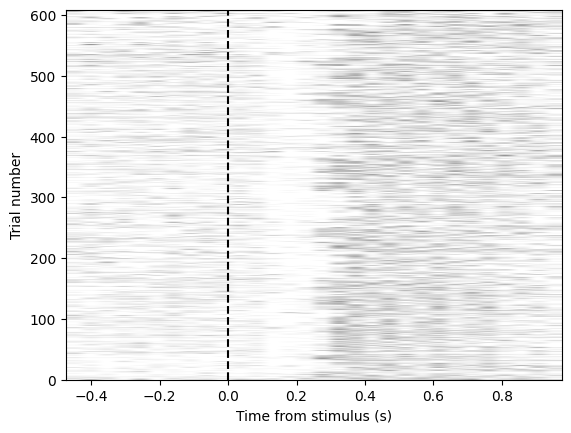

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(spike_raster, extent=[times[0], times[-1], 0, events.size], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
ax.axvline(0, c='k', linestyle='--')
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trial number')

## Exercise 5


Find all the probe insertions that crosses the region “SCig”, and select the first one available

Load in the spike sorting data for this probe insertion

Find the clusters in “SCig” that are good, i.e. with label = 1 . How many are there?

For the first good cluster in SCig, compute the mean firing rate between the first and last spike times

In [ ]:
from brainbox.io.one import SpikeSortingLoader
from one.api import ONE
import numpy as np

one = ONE()

# Define the brain region of interest
brain_acronym = 'SCig'

# Find the insertions that are in the brain region of interest
# Use one.search_insertions(atlas_acronym= ...) with the brain region as argument
insertions = one.search_insertions(atlas_acronym=brain_acronym)

# Count how many insertions there are
print(len(insertions))

# Take the first insertion available as pid
pid = insertions[0]
print(pid)

69
9b5fec96-9f19-4ddf-ba1c-3175e15245e9


In [ ]:
# If you struggle with the part above, skip and use :
# pid  = '4a3bf04f-c6e6-44ae-85af-6c8608fc7e99'
ssl = SpikeSortingLoader(pid=pid, one=one)
# Use the SpikesortingLoader to load in the spike sorting data, make sure to merge the clusters

spikes, clusters, channels = ssl.load_spike_sorting()
# Find the good clusters in the brain region of interest
# Use the clusters['acronym'] and the clusters['label']


# Get the cluster_id for the first good cluster



In [ ]:
# Get the index of the spikes for the chosen cluster


# Find the minimum and maximum spike time for this cluster


# Find the number of spikes for the chosen cluster and compute the firing rate

